# Introduction to Geopandas

https://www.kaggle.com/code/alanjo/eda-hard-drive-vs-solid-state-drives

In this tutorial part, we will learn the basics of loading and processing geographic data using Geopandas. Geopandas is built on top of Pandas and Numpy libraries. Like Pandas Dataframe, Geopandas data structure contains GeodataFrame and GeoSeries. Geopandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among others geometric operations and projections which it borrows from the Shapely library.

You can visualize and plot maps with Geopandas (provides a high-level interface to Matplotlib library) by using the plot() method on GeodataFrame/GeoSeries. In the first section, we will learn about geographic data, geographic coordinates and loading/writing geospatial data.

## Learning Objectives
1.   Read and write geographic data in Geopandas
2.   Read csv files and convert into Geopandas Geodataframe
3. Project and set Coordinate Reference Systems (CRS).



## Setup

Make sure you run the following cell(s) before trying to run any the following cells. You do not need to understand what they are doing, it's just a way to make sure there is a file we want to use stored on the computer running this notebook.

In [2]:
# Run only once
!mkdir countries_data

A subdirectory or file countries_data already exists.


In [5]:
!pip install requests

     -------------------------------------- 62.8/62.8 kB 848.4 kB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB ? eta 0:00:00
     ------------------------------------- 161.1/161.1 kB 10.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Run only once

%time

import requests


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

# Download & save countries data in Shapefiles format     
# Source: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/
# !curl https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip

# Download & save main cities data in GeoJSON format
# Source: http://geojson.xyz/ 
save_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson', 
          'ne_50m_populated_places_simple.geojson') 

# Download & save US states data in json format  
save_file('https://courses.cs.washington.edu/courses/cse163/21wi/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')

# Download & save Hurricane Florence data
save_file('https://courses.cs.washington.edu/courses/cse163/21wi/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')


#!unzip ne_110m_admin_0_countries.zip -d countries_data

CPU times: total: 0 ns
Wall time: 0 ns


'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


List files

In [16]:
!dir

 Volume in drive C is WIN10
 Volume Serial Number is 02AA-EC93

 Directory of c:\Users\PB3\Desktop\Day 4

10/27/2022  09:44 AM    <DIR>          .
10/27/2022  09:44 AM    <DIR>          ..
10/27/2022  09:06 AM    <DIR>          .vscode
10/27/2022  09:46 AM           181,171 18_geopandas.ipynb
10/26/2022  05:34 AM           250,034 19_geopandas - Exercises.ipynb
10/26/2022  05:34 AM             8,514 20_plotly.ipynb
10/27/2022  09:42 AM    <DIR>          countries_data
10/27/2022  09:31 AM         2,552,566 gz_2010_us_040_00_5m.json
10/27/2022  09:30 AM           914,888 ne_50m_populated_places_simple.geojson
10/27/2022  09:31 AM            13,685 stormhistory.csv
               6 File(s)      3,920,858 bytes
               4 Dir(s)  449,590,231,040 bytes free


In [18]:
!dir countries_data

 Volume in drive C is WIN10
 Volume Serial Number is 02AA-EC93

 Directory of c:\Users\PB3\Desktop\Day 4\countries_data

10/27/2022  09:42 AM    <DIR>          .
10/27/2022  09:42 AM    <DIR>          ..
08/02/2021  12:23 AM                 5 ne_110m_admin_0_countries.cpg
05/09/2022  11:46 AM           531,808 ne_110m_admin_0_countries.dbf
05/09/2022  11:46 AM               147 ne_110m_admin_0_countries.prj
05/09/2022  11:54 AM            41,905 ne_110m_admin_0_countries.README.html
05/09/2022  11:46 AM           180,924 ne_110m_admin_0_countries.shp
05/09/2022  11:46 AM             1,516 ne_110m_admin_0_countries.shx
05/09/2022  11:54 AM                 7 ne_110m_admin_0_countries.VERSION.txt
               7 File(s)        756,312 bytes
               2 Dir(s)  449,589,460,992 bytes free


In [19]:
# Run only once

#!pip install --upgrade pyshp

# Required Dependencies
# numpy, pandas (already installed in Colab)
# shapely (interface to GEOS)
!pip install --upgrade shapely

# fiona (interface to GDAL)
!pip install --upgrade fiona

# pyproj (interface to PROJ)
!pip install --upgrade pyproj

# rtree (spatial index to improve performance & required for overlay operations)
!pip install --upgrade rtree

# Install geopandas
!pip install --upgrade geopandas

# Geopandas requirement
!pip install --upgrade descartes


     ---------------------------------------- 1.3/1.3 MB 4.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 21.7/21.7 MB 34.4 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 58.8/58.8 kB ? eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 4.8/4.8 MB 12.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 433.3/433.3 kB 2.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.1/1.1 MB 3.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!pip freeze

asttokens==2.0.8
attrs==22.1.0
backcall==0.2.0
certifi==2022.9.24
charset-normalizer==2.1.1
click==8.1.3
click-plugins==1.1.1
cligj==0.7.2
colorama==0.4.5
contourpy==1.0.5
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
descartes==1.1.0
entrypoints==0.4
executing==1.1.1
Fiona==1.8.22
fonttools==4.37.4
geopandas==0.12.0
idna==3.4
ipykernel==6.16.1
ipython==8.5.0
jedi==0.18.1
jupyter_client==7.4.3
jupyter_core==4.11.2
kiwisolver==1.4.4
matplotlib==3.6.0
matplotlib-inline==0.1.6
munch==2.5.0
nest-asyncio==1.5.6
numpy==1.23.4
packaging==21.3
pandas==1.5.1
parso==0.8.3
pickleshare==0.7.5
Pillow==9.2.0
prompt-toolkit==3.0.31
psutil==5.9.3
pure-eval==0.2.2
Pygments==2.13.0
pyparsing==3.0.9
pyproj==3.4.0
python-dateutil==2.8.2
pytz==2022.5
pywin32==304
pyzmq==24.0.1
requests==2.28.1
Rtree==1.0.1
scipy==1.9.3
seaborn==0.12.1
Shapely==1.8.5.post1
six==1.16.0
stack-data==0.5.1
tornado==6.2
traitlets==5.5.0
urllib3==1.26.12
wcwidth==0.2.5


In [21]:
# Make plot output stored in notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


# 1. Reading Geographic data

In [22]:
# Look inside data folder that we have unzipped it
!dir countries_data

 Volume in drive C is WIN10
 Volume Serial Number is 02AA-EC93

 Directory of c:\Users\PB3\Desktop\Day 4\countries_data

10/27/2022  09:42 AM    <DIR>          .
10/27/2022  09:42 AM    <DIR>          ..
08/02/2021  12:23 AM                 5 ne_110m_admin_0_countries.cpg
05/09/2022  11:46 AM           531,808 ne_110m_admin_0_countries.dbf
05/09/2022  11:46 AM               147 ne_110m_admin_0_countries.prj
05/09/2022  11:54 AM            41,905 ne_110m_admin_0_countries.README.html
05/09/2022  11:46 AM           180,924 ne_110m_admin_0_countries.shp
05/09/2022  11:46 AM             1,516 ne_110m_admin_0_countries.shx
05/09/2022  11:54 AM                 7 ne_110m_admin_0_countries.VERSION.txt
               7 File(s)        756,312 bytes
               2 Dir(s)  449,519,845,376 bytes free


Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc).  
We can read a `GeoDataFrame` from a file using `read_file`.

In [23]:
import fiona
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

## Countries Data

In [24]:
# Read Countries data
countries = gpd.read_file("countries_data/ne_110m_admin_0_countries.shp")
countries.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [25]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [26]:
# Rows and columns of the countries data
countries.shape

(177, 169)

In [27]:
# Descriptive statistics of the countries data
countries.describe()

,scalerank,LABELRANK,ADM0_DIF,LEVEL,GEOU_DIF,SU_DIF,BRK_DIFF,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,...,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID
count,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02
mean,1.011299,3.711864,0.101695,1.988701,0.0,0.011299,0.016949,3.231638,3.485876,3.796610,...,8.960452,4.734463,-93.231638,-2.389831,0.088701,3.291525,8.148588,22.017317,19.318850,1.159321e+09
std,0.150329,1.353248,0.303104,0.105996,0.0,0.105996,0.129447,1.718057,1.886276,2.103404,...,4.834020,1.124418,23.641439,18.148081,0.697794,1.010786,1.105210,59.970759,26.538967,3.381290e+02
min,1.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,-99.000000,-99.000000,0.000000,1.700000,5.200000,-102.289448,-79.843222,1.159320e+09
25%,1.000000,3.000000,0.000000,2.000000,0.0,0.000000,0.000000,2.000000,2.000000,2.000000,...,6.000000,4.000000,-99.000000,1.000000,0.000000,2.700000,7.000000,-3.464718,4.448298,1.159321e+09
50%,1.000000,3.000000,0.000000,2.000000,0.0,0.000000,0.000000,3.000000,3.000000,3.000000,...,7.000000,4.000000,-99.000000,1.000000,0.000000,3.000000,8.000000,23.458829,19.587062,1.159321e+09
75%,1.000000,5.000000,0.000000,2.000000,0.0,0.000000,0.000000,5.000000,5.000000,5.000000,...,10.000000,5.000000,-99.000000,1.000000,0.000000,4.000000,9.000000,45.874383,40.402387,1.159321e+09
max,3.000000,7.000000,1.000000,2.000000,0.0,1.000000,1.000000,7.000000,8.000000,9.000000,...,35.000000,10.000000,5.000000,1.000000,7.000000,6.000000,11.000000,177.975427,74.319387,1.159321e+09


In [28]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int64(25), object(137)
memory usage: 233.8+ KB


In [30]:
countries.columns.values

array(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF',
       'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF',
       'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV',
       'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0',
       'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8',
       'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR',
       'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2',
       'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3',
       'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO',
       'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU',
       'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN',
       'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB',
       'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA',
       'ADM0_A3_EG

Geopandas is built on top of Matplotlib and Descartes to visualize maps easily. We can use `plot()` method to easily plot a map.

<AxesSubplot: >

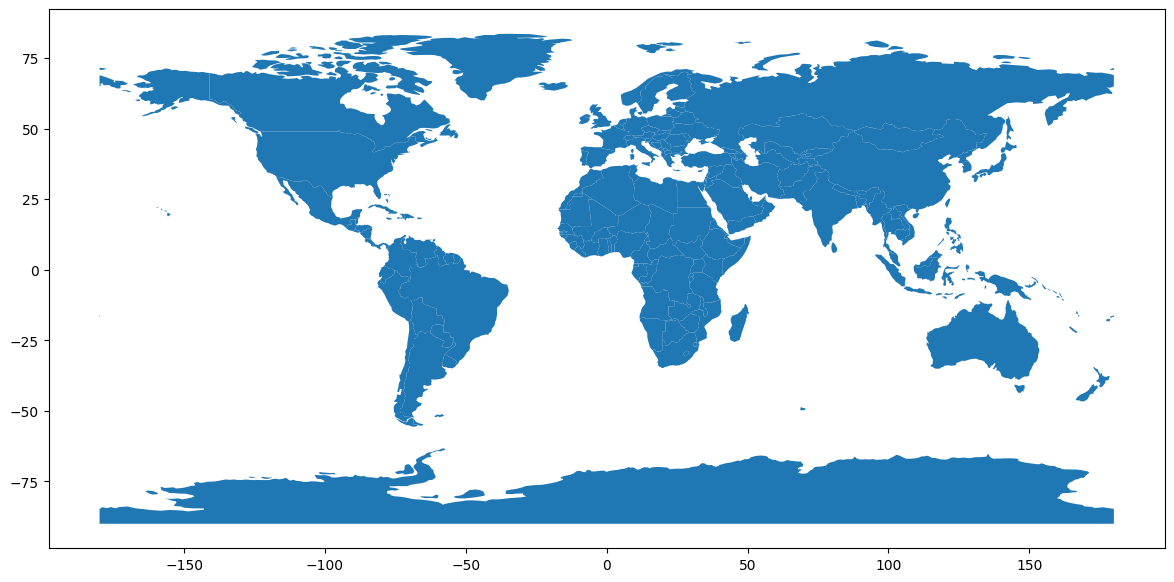

In [31]:
countries.plot(figsize=(15,7))

<AxesSubplot: >

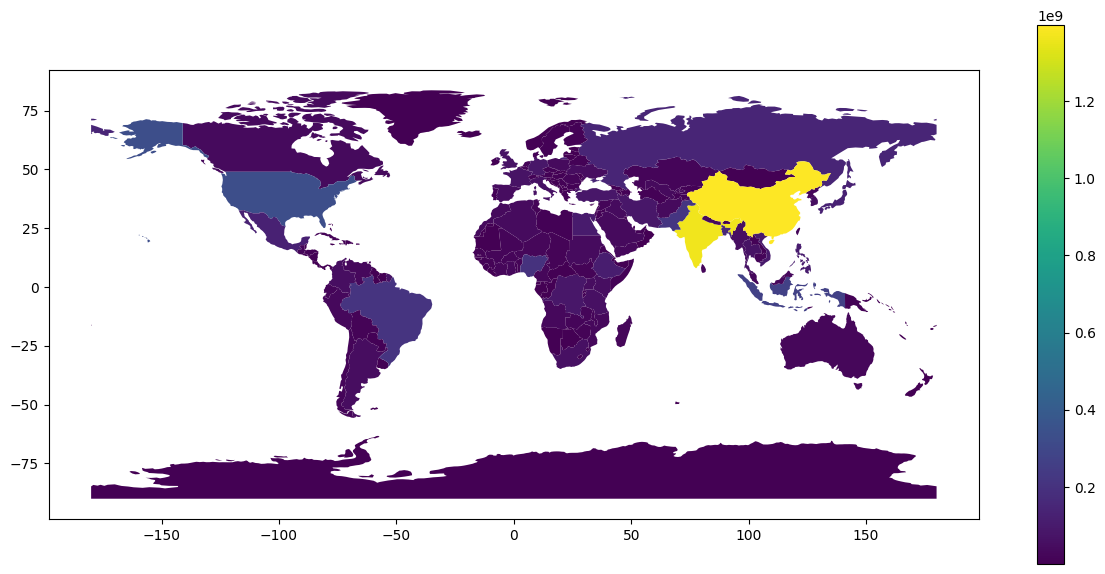

In [33]:
#Plot Population estimates using Choropleth Map (color of each shapes is based on the value of an associated variable)
countries.plot(column='POP_EST', legend=True, figsize=(15,7))

However, the default appearance of the legend and plot axes may not be desirable. One can define the plot axes (with `ax`) and the legend axes (with `cax`) and then pass those in to the `plot()` call. The following example uses `mpl_toolkits` to vertically align the plot axes and the legend axes:

<AxesSubplot: >

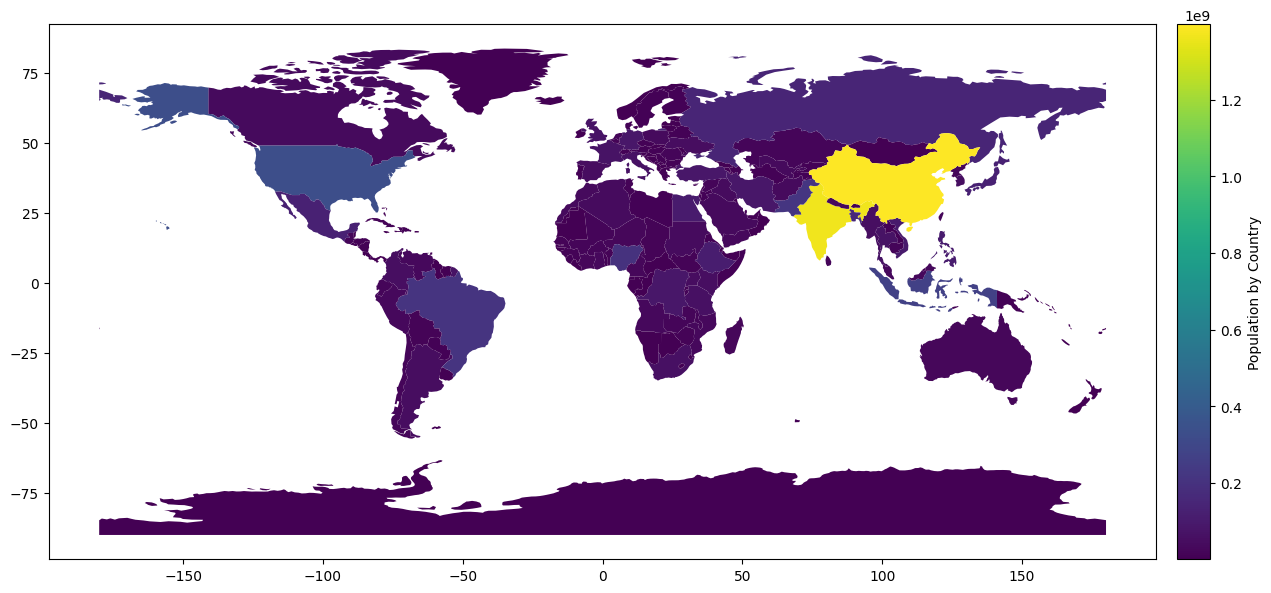

In [36]:
#Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(15,7))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
countries.plot(column='POP_EST', 
                legend=True, 
                cax=cax, 
                ax=ax, 
                legend_kwds={'label':"Population by Country"})

<AxesSubplot: >

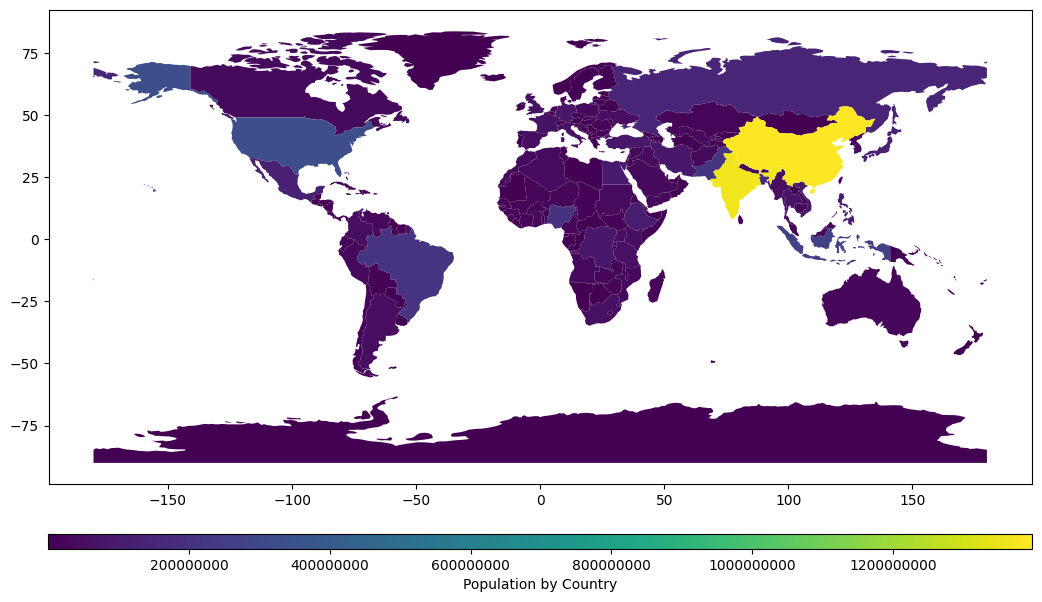

In [40]:
#Plot population estimates with an accurate horizontal legend
fig, ax = plt.subplots(1, 1, figsize=(15,7))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.5)
countries.plot(column='POP_EST', 
                legend=True, 
                cax=cax, 
                ax=ax, 
                legend_kwds={'label':"Population by Country",
                            'orientation': "horizontal",
                            'format': "%.0f"})

You can also modify the colors used by plot() with the cmap option (for a full list of colormaps, see the [matplotlib website](https://matplotlib.org/stable/tutorials/colors/colormaps.html)):

<AxesSubplot: >

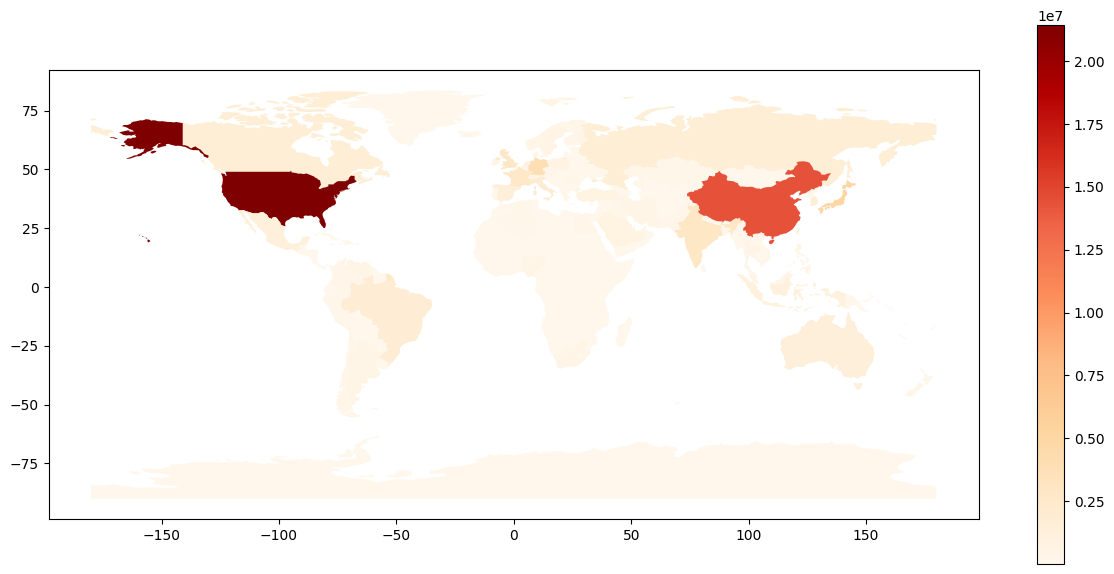

In [43]:
countries.plot(column='GDP_MD', cmap='OrRd', figsize=(15,7), legend=True)

If you want to show just the boundary, use `boundary.plot()`

<AxesSubplot: >

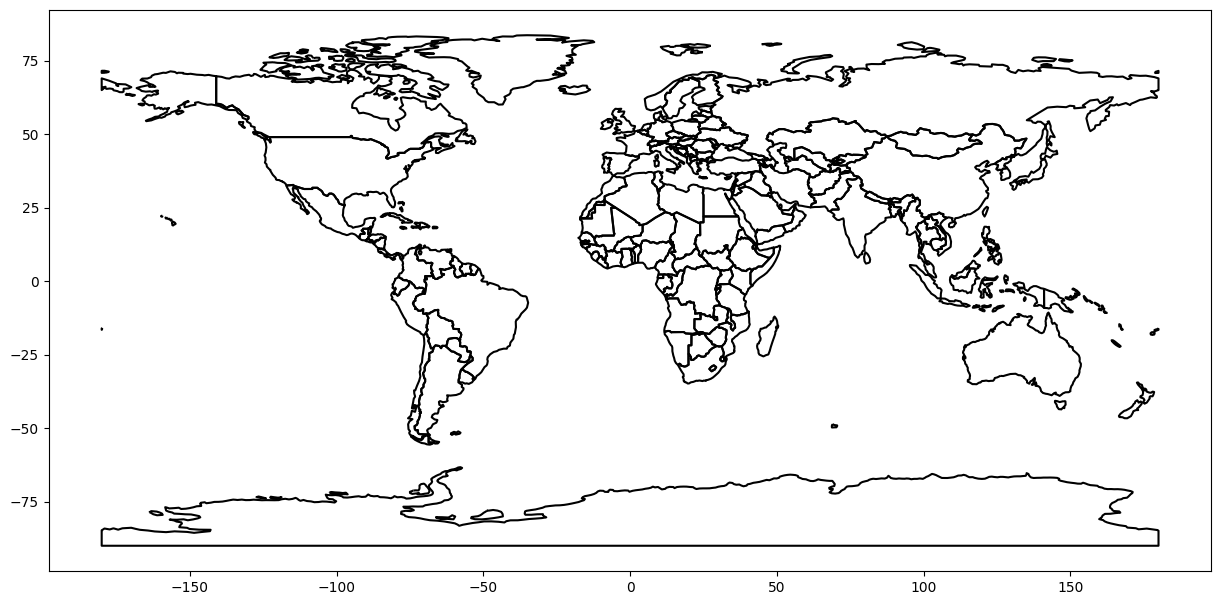

In [46]:
countries.boundary.plot(figsize=(15,10), edgecolor="black")

Maps usually do not have to have axis labels. You can turn them off using `set_axis_off()` or `axis("off")` axis methods.

(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

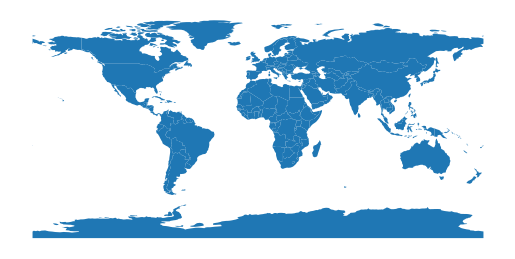

In [48]:
countries.plot().axis("off")

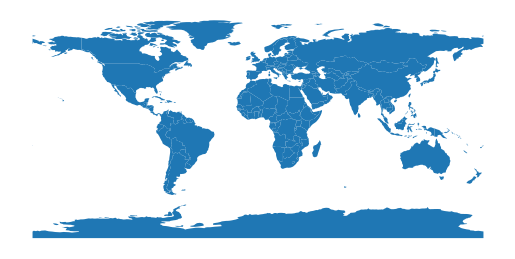

In [50]:
fig, ax = plt.subplots(1, 1)
countries.plot(ax=ax)
ax.set_axis_off()

You can remove Antarctica continent

In [55]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [56]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [57]:
countries.NAME.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

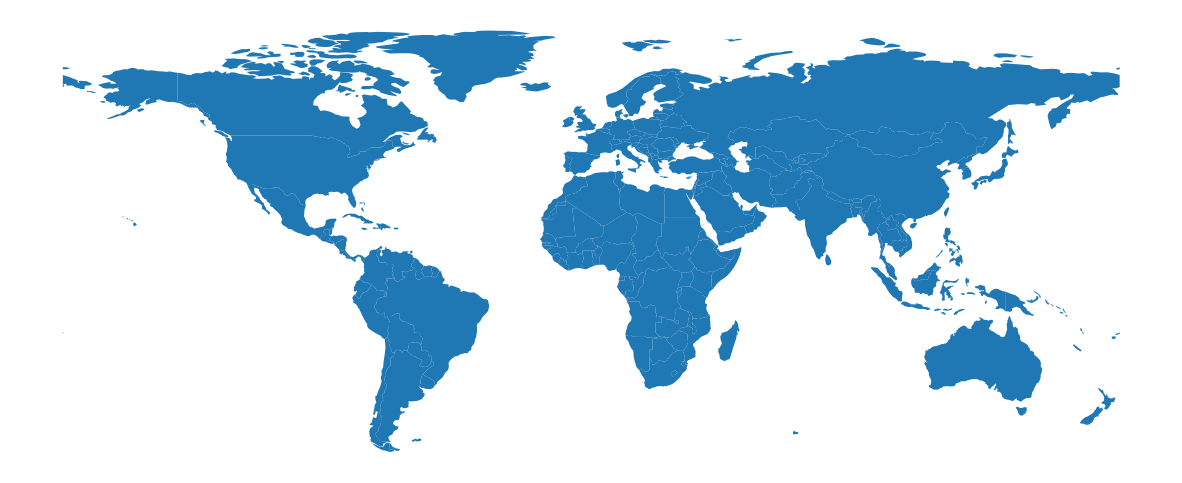

In [88]:
countries_no_ant = countries[(countries.NAME != "Antarctica")]

fig, ax = plt.subplots(1, 1, figsize=(15,8))
countries_no_ant.plot(ax=ax)
ax.set_axis_off()

You can use similar pandas functionality, like basic stats and filterings

In [60]:
countries['GDP_MD'].mean()

493473.85310734465

Note: GDP values have been updated to 2016/2017 vintage (primarily from CIA World Factbook)

Let's see if we can plot "low populated and rich" countries 
Criteria

*   GDP > 500,000 Million USD 
*   Population < 40 million people




<AxesSubplot: >

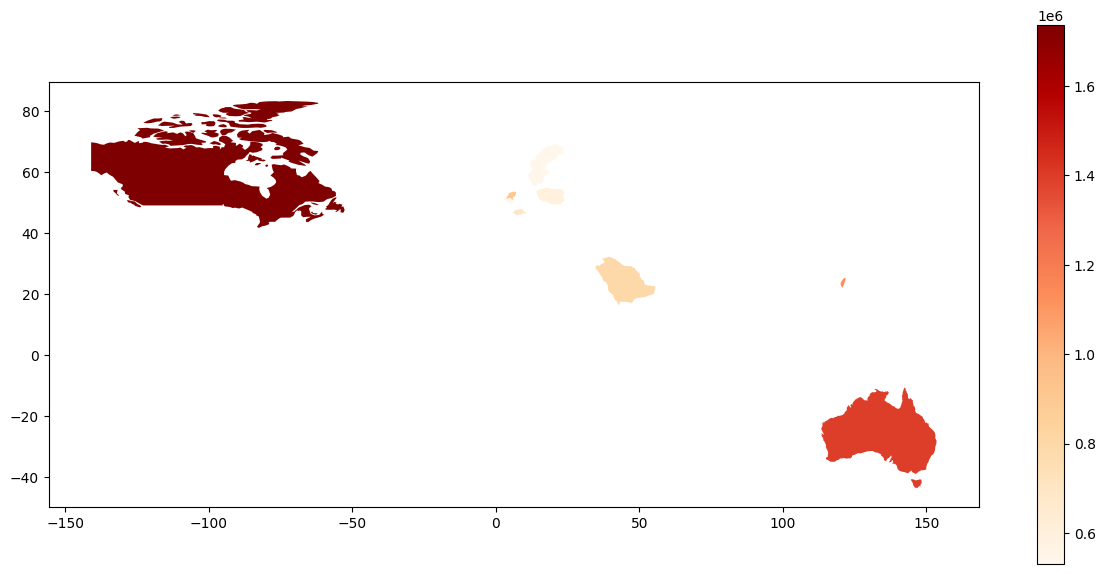

In [66]:
low_pop_and_rich = countries[(countries['GDP_MD'] > 500000) & (countries['POP_EST'] < 40000000)]
low_pop_and_rich.plot(column='GDP_MD', cmap='OrRd', legend=True, figsize=(15,7))

In [62]:
low_pop_and_rich.NAME

3            Canada
110          Sweden
113          Poland
127     Switzerland
129         Belgium
130     Netherlands
137       Australia
140          Taiwan
158    Saudi Arabia
Name: NAME, dtype: object

Filter the data to rows that belong in Asia, then plot that

In [68]:
countries.CONTINENT.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

<AxesSubplot: >

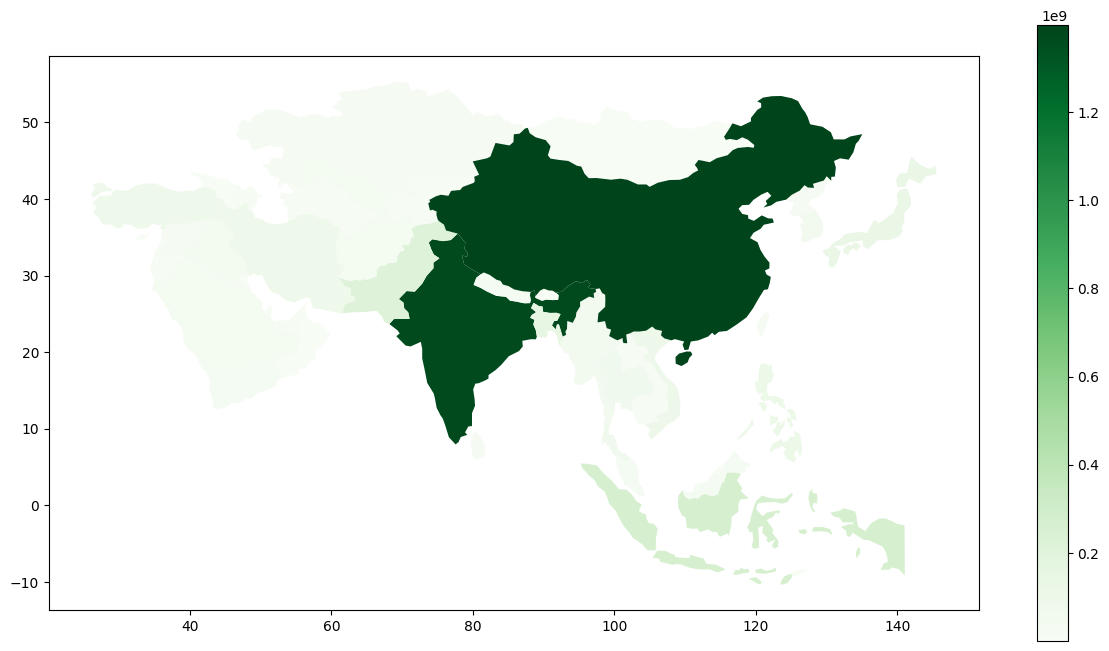

In [70]:
asia = countries[countries['CONTINENT'] == 'Asia']
asia.plot(column='POP_EST', legend=True, figsize=(15,8), cmap="Greens")

We can clearly see that China has the largest population.

## Cities Data

In [71]:
# Read Cities data
cities = gpd.read_file('ne_50m_populated_places_simple.geojson')
cities.head()

# Alternative dataset included in Geopandas libary


,scalerank,natscale,labelrank,name,namepar,namealt,diffascii,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,changed,namediff,diffnote,pop_max,pop_min,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,featureclass,geometry
0,10,1,5,Bombo,None,None,0,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,4,1,Added missing admin-1 capital. Changed feature...,75000,21000,0,8,7,-1,None,None,0,0,Admin-1 region capital,POINT (32.53330 0.58330)
1,10,1,5,Fort Portal,None,None,0,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,4,1,Added missing admin-1 capital. Changed feature...,42670,42670,0,7,7,233476,None,None,0,0,Admin-1 region capital,POINT (30.27500 0.67100)
2,10,1,3,Potenza,None,None,0,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798996,4,1,Added missing admin-1 capital. Population from...,69060,69060,0,8,8,3170027,None,None,0,0,Admin-1 region capital,POINT (15.79900 40.64200)
3,10,1,3,Campobasso,None,None,0,Campobasso,0,0,None,0,0,Italy,ITA,Italy,ITA,Molise,IT,None,41.562999,14.655997,4,1,Added missing admin-1 capital. Population from...,50762,50762,0,8,8,3180991,None,None,0,0,Admin-1 region capital,POINT (14.65600 41.56300)
4,10,1,3,Aosta,None,None,0,Aosta,0,0,None,0,0,Italy,ITA,Italy,ITA,Valle d'Aosta,IT,None,45.737001,7.315003,4,1,Added missing admin-1 capital. Population from...,34062,34062,0,7,7,3182997,None,None,0,0,Admin-1 region capital,POINT (7.31500 45.73700)


In [72]:
# Rows and columns of the cities data
cities.shape

(1249, 37)

In [73]:
# Descriptive statistics of the cities data
cities.describe()

,scalerank,natscale,labelrank,diffascii,adm0cap,capalt,worldcity,megacity,latitude,longitude,changed,namediff,pop_max,pop_min,pop_other,rank_max,rank_min,geonameid,ls_match,checkme
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1249.000000,1.249000e+03,1249.000000,1249.000000
mean,3.647718,97.563651,3.285829,0.011209,0.160128,0.012010,0.056045,0.369896,18.891863,19.574082,1.559648,0.040833,1.181373e+06,7.275236e+05,1.146230e+06,9.690953,9.178543,2.245091e+06,0.942354,0.559648
std,1.450297,97.557072,2.553743,0.105320,0.366872,0.108972,0.230100,0.482970,31.642144,80.135946,2.479048,0.197982,2.329440e+06,1.386203e+06,2.125661e+06,2.829943,2.832558,1.643724e+06,0.268318,1.488149
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-89.982894,-175.220564,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.123000e+03,0.000000,0.000000
25%,3.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.214988,-57.579984,0.000000,0.000000,1.133640e+05,7.621800e+04,3.340000e+04,9.000000,8.000000,1.024552e+06,1.000000,0.000000
50%,4.000000,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.787611,24.934126,0.000000,0.000000,4.423150e+05,2.772690e+05,3.350010e+05,10.000000,10.000000,2.035265e+06,1.000000,0.000000
75%,4.000000,110.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,42.683349,82.614947,4.000000,0.000000,1.281000e+06,7.851780e+05,1.173865e+06,12.000000,11.000000,3.419842e+06,1.000000,0.000000
max,10.000000,600.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.216684,179.216647,40.000000,1.000000,3.567600e+07,1.460851e+07,1.680357e+07,14.000000,14.000000,6.943713e+06,2.000000,5.000000


Now we can plot cites data points on world map (countries data), we call this "overlaying".

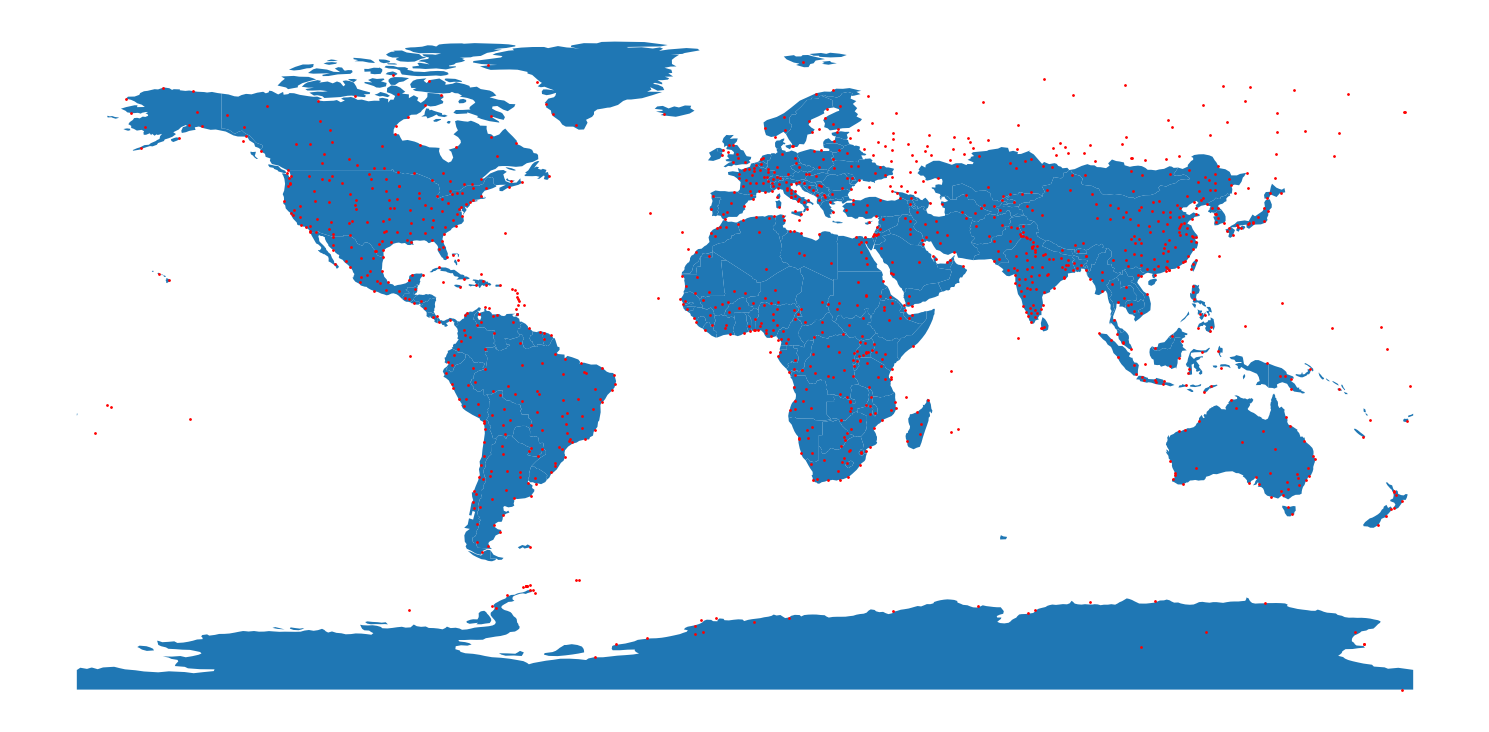

In [78]:
# Plot overlayed maps
fig, ax = plt.subplots(1, 1, figsize=(15,8))
countries_no_ant.plot(ax=ax)
ax.set_axis_off()
cities.plot(markersize=1, color='red', ax=ax)

# Automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.tight_layout()
#Save plot as png file
plt.savefig('overlay_map.png')


Back to low population and rich countries data, we can also overlay them over a world map

<AxesSubplot: >

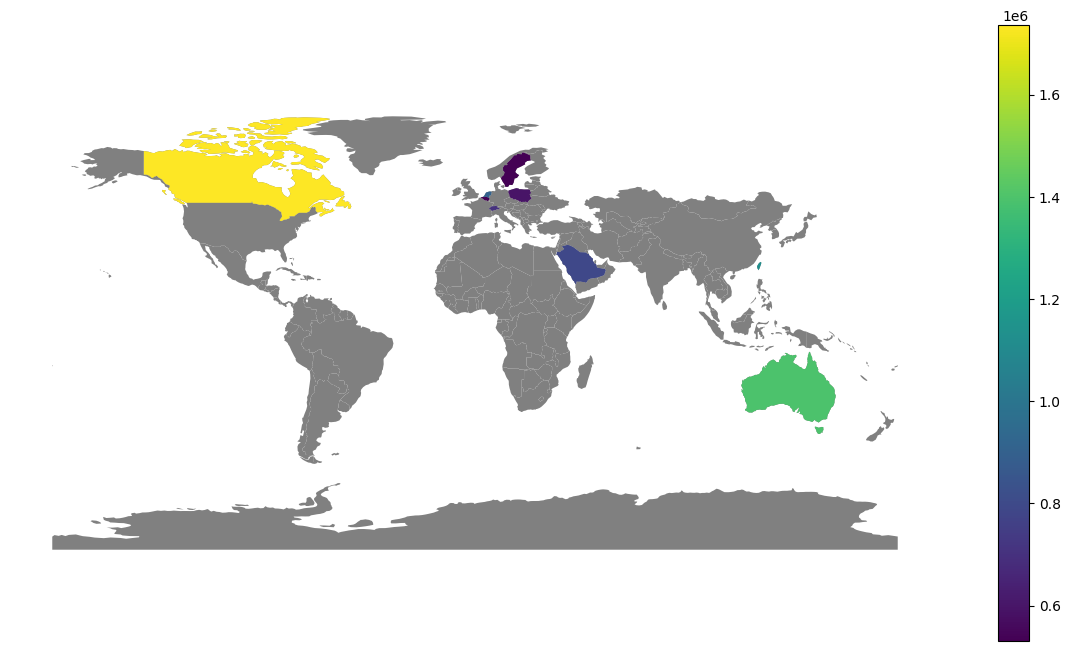

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
countries_no_ant.plot(ax=ax, color='Grey')
ax.set_axis_off()
low_pop_and_rich.plot(column='GDP_MD', legend=True, ax=ax)

# 2. Coordinate Systems and Projections

Coordinate reference systems represent how our data as two dimensional (planar) relates to actual places on earth. It is the glue that holds the attributes to their respective locations. Geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. Geodataframes has `.crs` attribute that can give you the original CRS used in the data. A CRS tells Python how those coordinates relate to places on the Earth.

It is easy to transform and project these coordinates. However, to perform projections, it is necessary to have the same CRS in order to carry out geographic analysis and get the right values out the analysis. The countries, cities and rivers have the same CRS. Let's check them.

In [80]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Projections are referenced using **European Petroleum Survey Group (EPSG)** codes

Different CRS have different measurements. For some, the coordinates are defined in decimal degrees while others are defined in meters. It is common process to reproject data from one format to another in Geographic data processing. This source is very useful in visualizing and comparing different Projections: https://map-projections.net/compare.php?p1=mercator-84&p2=robinson&sps=1

## Project into Mercator Projection

We will project our data into mercator. The Mercator projection, latitude-longitude quadrangles are stretched along the x-axis and y-axis as you move away from the equator.

In [83]:
# Look at the geometry column: decimal degrees
countries.geometry.head()

0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
Name: geometry, dtype: geometry

In [89]:
# Project the data into Mercator Projection epsg=3395
mercator = countries_no_ant.to_crs(3395)

# See the geometry column of the projected countries
mercator['geometry'].head()

0    MULTIPOLYGON (((20037508.343 -1800679.237, 200...
1    POLYGON ((3774143.866 -105050.440, 3792946.708...
2    POLYGON ((-964649.018 3185897.152, -964597.245...
3    MULTIPOLYGON (((-13674486.249 6242596.000, -13...
4    MULTIPOLYGON (((-13674486.249 6242596.000, -13...
Name: geometry, dtype: geometry

In [85]:
mercator.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Due to the projection, the geometry is no longer in lat/lon style. It is easier to understand the difference in maps. Let us plot both the original countries and the projected countries.

Text(0.5, 1.0, '4325')

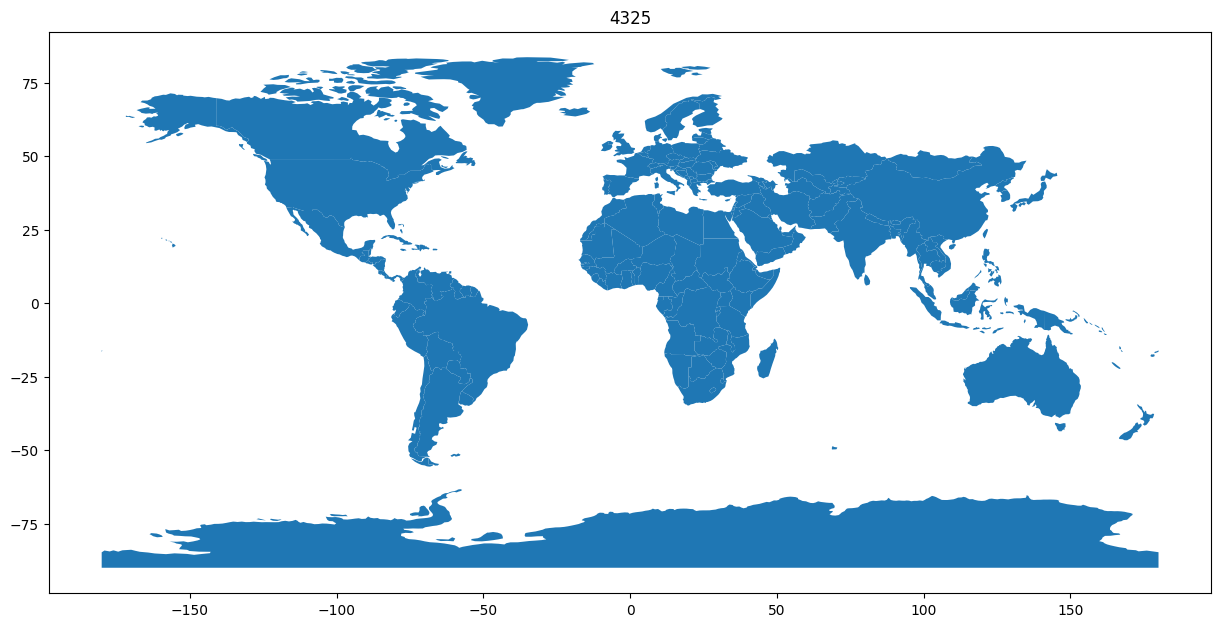

In [86]:
# Let us plot both unprojected and projected countries
ax = countries_no_ant.plot(figsize=(15,12))
ax.set_title("4325")

Text(0.5, 1.0, 'Mercator')

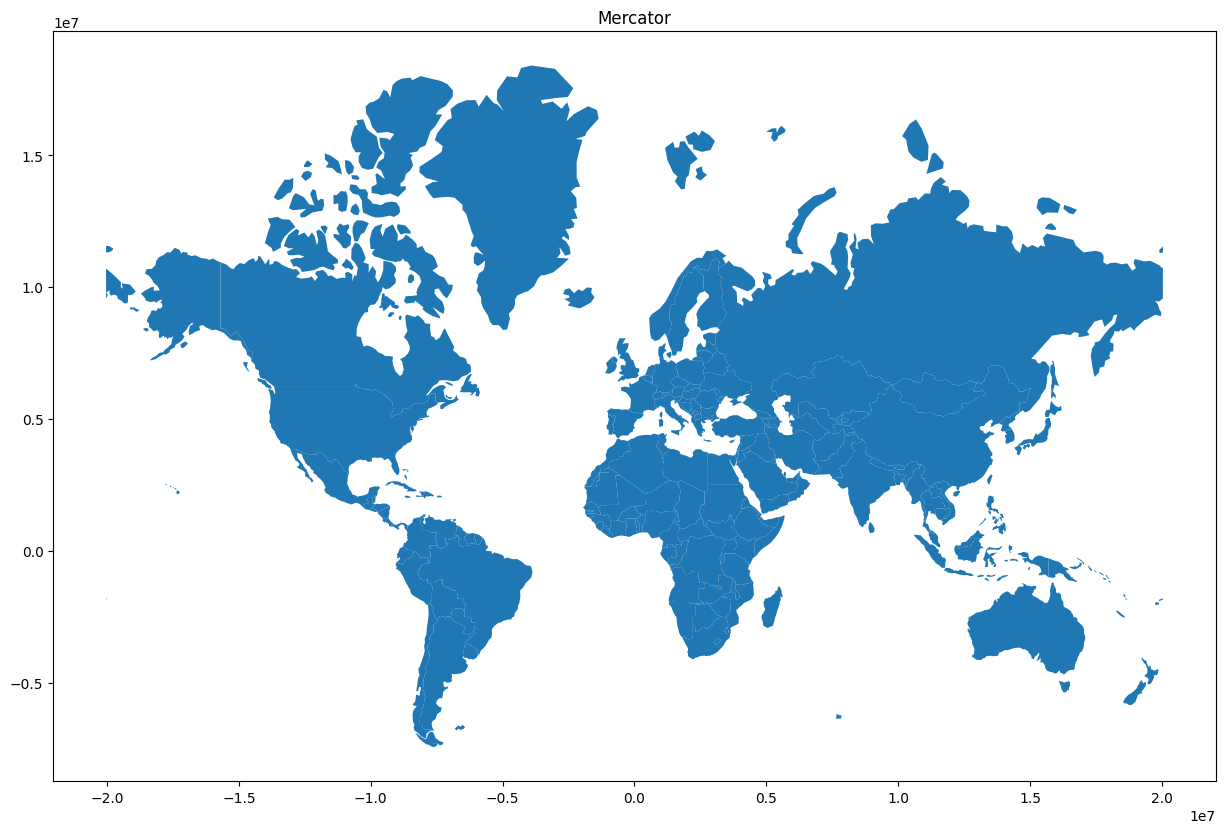

In [90]:
ax = mercator.plot(figsize=(15,12))
ax.set_title("Mercator")

Notice the different scales of x and y in both maps. If you try to overlay the projected data with unprojected data, then your data will not align properly. Let us see if we can plot cities on the top of projected countries. Remember we have not projected the cities.

<AxesSubplot: title={'center': 'Mercator'}>

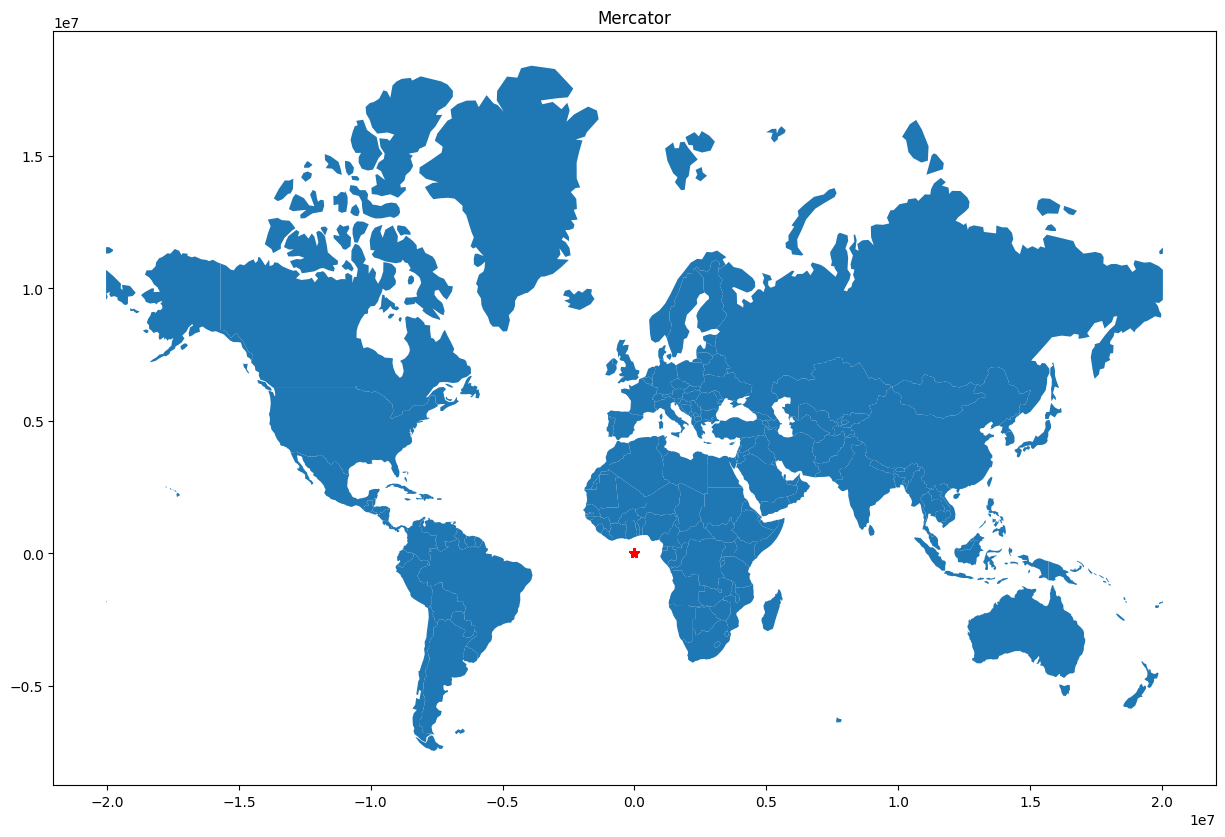

In [92]:
ax = mercator.plot(figsize=(15,12))
ax.set_title("Mercator")
cities.plot(ax=ax, marker='*', color='red')
# Cities are still in WGS84


## **Exercise 1**: Convert the cities data into EPSG:3395 and plot cities on top of mercator projection

In [99]:
cities_m.name.to_list()

['Bombo',
 'Fort Portal',
 'Potenza',
 'Campobasso',
 'Aosta',
 'Mariehamn',
 'Ramallah',
 'Vatican City',
 'Poitier',
 'Clermont-Ferrand',
 'Besancon',
 'Artigas Base',
 'Chipata',
 'Jinja',
 'Arua',
 'Mbale',
 'Moroto',
 'Masaka',
 'Mbarara',
 'Otjiwarongo',
 'Bologna',
 'Cagliari',
 'Catanzaro',
 'Bari',
 "L'Aquila",
 'Ancona',
 'Perugia',
 'Trieste',
 'Trento',
 'Fort-de-France',
 'Gifu',
 'Saint-Laurent-du-Maroni',
 'Caen',
 'Nantes',
 'Ajaccio',
 'Montpellier',
 'Dijon',
 'Orleans',
 'Rouen',
 'Reims',
 'Amiens',
 'Nancy',
 'Basse-terre',
 'Novi Sad',
 'Banja Luka',
 'George Town',
 'Grand Turk',
 'Douglas',
 'San Marino',
 'Willemstad',
 'Oranjestad',
 'Vaduz',
 'Capitan Arturo Prat Station',
 'Marambio Station',
 'Zucchelli Station',
 'Rothera Station',
 'Palmer Station',
 'Base Presidente Montalva',
 'Carlini Station',
 'King Sejong Station',
 'Great Wall Station',
 'Escudero Base',
 'Elephant Island',
 'Scott Base',
 'McMurdo Station',
 'Zhongshan Station',
 'Vostok',
 'Peter

In [104]:
cities_m.longitude.min()

-175.220564478

In [105]:
cities_m.latitude.min()

-89.9828938613

In [107]:
cities_m_no = cities_m[cities_m['latitude'] != cities_m.latitude.min()]

<AxesSubplot: >

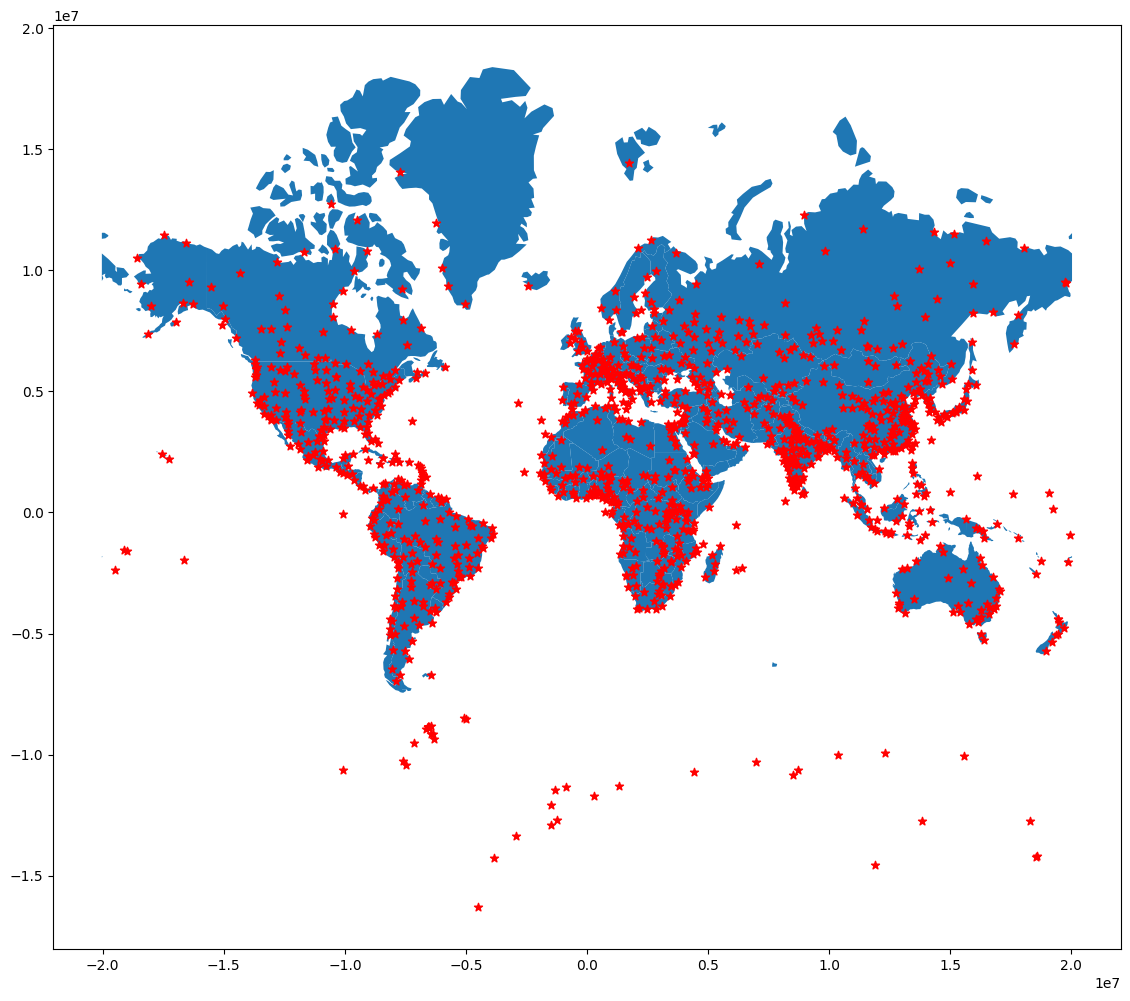

In [108]:
#cities_m = cities.to_crs(mercator.crs)
fig, ax = plt.subplots(figsize=(15,12))
mercator.plot(ax=ax)
cities_m_no.plot(ax=ax, marker='*', color='red')

# 3. Writing Geographic/Spatial Data

We can easily save any new data created to our local disk. This is helpful when you want to access that file in another time without carrying out the same operations again. Let us save our projected countries to our disk space. Remember we have projected it. So in case we need it another time, let us save it.

GeoDataFrames can be exported to many different standard formats using the `to_file(path/to/file + extension)`

In [110]:
mercator.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [109]:
!mkdir countries_mercator

In [111]:
mercator.to_file('countries_mercator/ne_110m_admin_0_epsg3395.shp')

In [112]:
mercator.to_file('countries_mercator/ne_110m_admin_0_epsg3395.geojson')

In [113]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [ ]:
!mkdir countries_projected_data

In [ ]:
# Save projected countries to Shapefile


In [ ]:
# Save projected countries to GeoJSON


## **Exercise 2**: Save the projected cities file you created in Exercise 1 into a shp file.

In [114]:
!mkdir cities_projected_data

# 4. Convert DataFrame to a GeodataFrame

In certain circumstance, a dataset might store geodata in a dataframe format.

This example will plot the data of the hurricane at various points in time over US states.

In [115]:
us_states = gpd.read_file('gz_2010_us_040_00_5m.json')
us_states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


<AxesSubplot: >

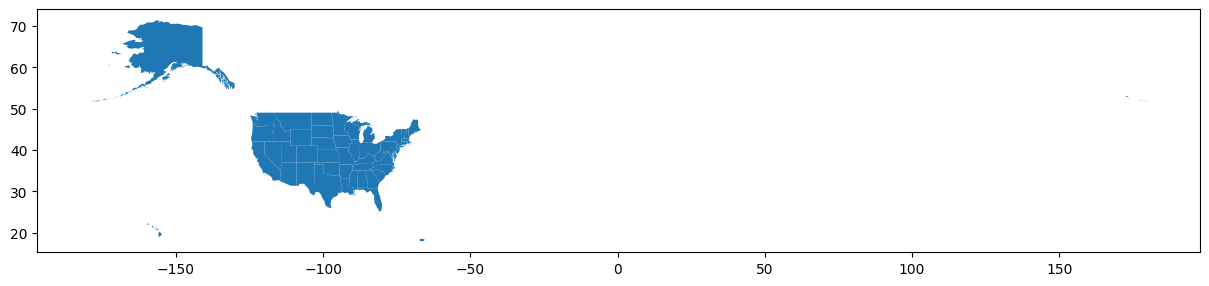

In [116]:
us_states.plot(figsize=(15,12))

Hawaii is on the far right and Alaska is on the top left, we should exclude them to filter only mainland USA.

<AxesSubplot: >

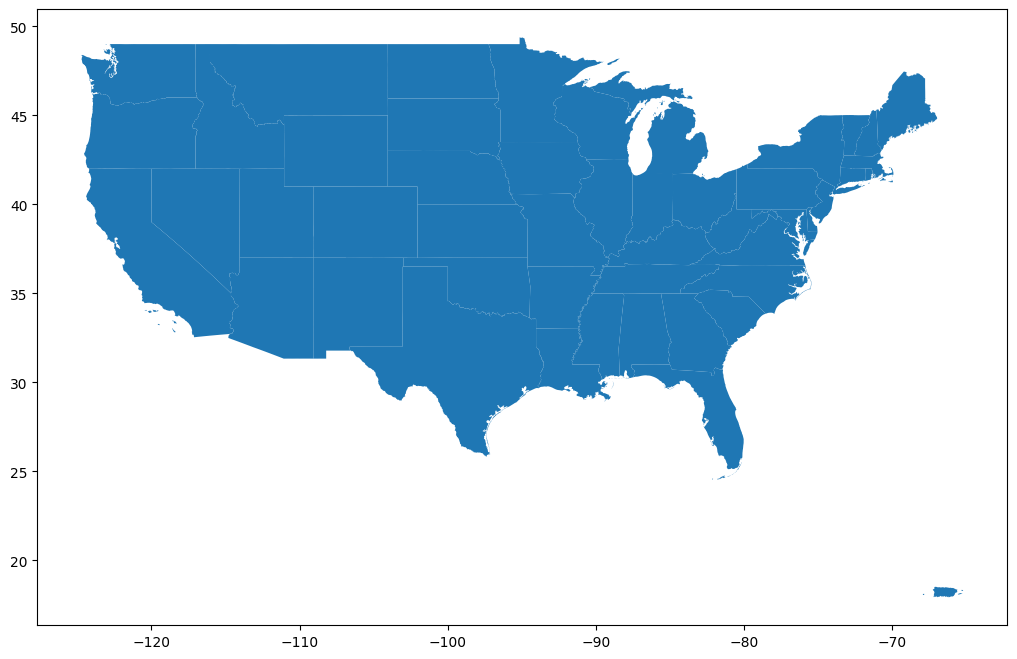

In [119]:
mainland = us_states[~us_states['NAME'].isin(['Alaska','Hawaii'])]
mainland.plot(figsize=(15,8))

In [120]:
import pandas as pd
florence = pd.read_csv('stormhistory.csv')
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


In [122]:
type(florence); type(us_states)

geopandas.geodataframe.GeoDataFrame

We noticed that this is a plain old DataFrame and does not have the capability of doing geo operations yet. We first have to transform the data into a `GeoDataFrame` so we can plot it appropriately.

To do this, we will create a new colum that stores the latitude/longitude together in a `Point`. We need to use the `zip` function to do this.

In [123]:
from shapely.geometry import Point

In [126]:
florence['coordinates'] = [Point(-long, lat) for long, lat in zip(florence['Long'], florence['Lat'])]

c:\Users\PB3\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [127]:
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila,POINT (-18.4 12.9)
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila,POINT (-19 12.9)
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila,POINT (-19.4 12.9)
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven,POINT (-20.4 13.1)
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven,POINT (-20.9 13.2)


In [128]:
# Convert the florence DataFrame into a GeoDataFrame
florence = gpd.GeoDataFrame(florence, geometry='coordinates')

<AxesSubplot: >

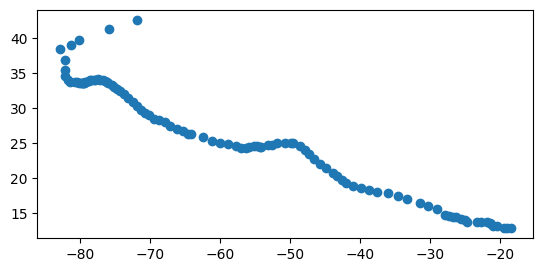

In [129]:
florence.plot()

<AxesSubplot: >

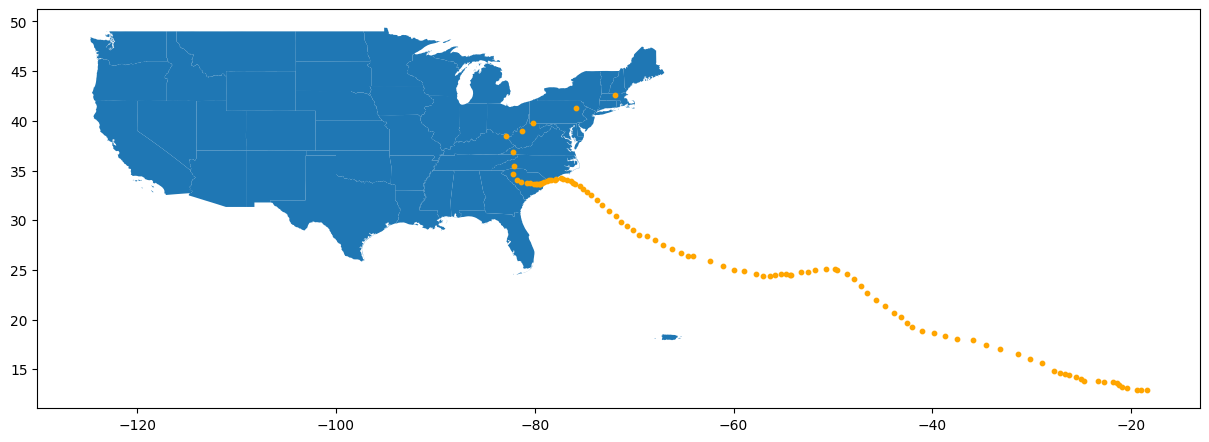

In [130]:
fig, ax = plt.subplots(1, figsize=(15,8))

mainland.plot(ax=ax)

florence.plot(ax=ax, color='orange', markersize=10)